### functions

In [6]:
import cobra
import numpy as np
import matplotlib.pyplot as plt

def generate_toy_model(filename='../data/toy_model.json'):
    model = cobra.Model('toy_model')
    r1 = cobra.Reaction('R1')
    r2 = cobra.Reaction('R2')
    rs = cobra.Reaction('Rs')
    rb = cobra.Reaction('Rb')
    rp = cobra.Reaction('Rp')
    model.add_reactions([r1, r2, rs, rb, rp])

    r1.reaction = 'S --> B'
    r2.reaction = '2 S --> B + P'

    rs.reaction = ' --> S'
    rb.reaction = 'B --> '
    rp.reaction = 'P --> '

    model.objective = 'Rb'
    cobra.io.save_json_model(model, filename)

    return model


def load_toy_model(filename='../data/toy_model.json'):
    try:
        model = cobra.io.load_json_model(filename)
    except:
        model = generate_toy_model()
    return model


def toy_model_condition2(model_):
    model = model_.copy()
    model.reactions.get_by_id('Rs').upper_bound = 10
    return model


def toy_model_condition3(model_):
    model = model_.copy()
    model.reactions.get_by_id('Rs').upper_bound = 10
    model.reactions.get_by_id('R1').upper_bound = 5
    return model


# def toy_model_condition4(model_):
#     model = model_.copy()
#     model.reactions.get_by_id('Rs').upper_bound = 10
#     model.reactions.get_by_id('R1').upper_bound = 0
#     return model
def toy_model_condition4(model_):
    model = model_.copy()
    model.reactions.get_by_id('Rs').upper_bound = 10
    model.reactions.get_by_id('R2').lower_bound = 1
    return model


# def opt_yield(model_):
#     model = model_.copy()


def plot_rs_rb_condition2(model2):
    model = model2.copy()

    rs_list = list(range(0, 11))
    rb_list = []
    yb_list = []

    for x in rs_list:
        if x == 0:
            x = 0.01
        model.reactions.get_by_id('Rs').upper_bound = x
        f = model.optimize().fluxes
        rb_list.append(f['Rb'])
        yb_list.append(f['Rb'] / f['Rs'])

    fontsize = 12
    fig, axs = plt.subplots(1, 1, figsize=(3.5, 3))
    ax1 = axs

    ax1.plot(rs_list, rb_list, color="black", alpha=0.8, label='rate')
    ax1.bar([5, 5], [0, -1], width=10, color="tab:orange", alpha=0.5, label='R1')
    ax1.plot(0, 0, color="tab:blue", alpha=0.8, label='yield')
    ax1.plot([0, 0], [-1, 7.5], color="grey", linestyle='dashed', linewidth=0.75, alpha=0.8, )
    ax1.plot([10, 10], [-1, 10.5], color="grey", linestyle='dashed', linewidth=0.75, alpha=0.8, )

    ax1.set(xlim=(-1, 11), xticks=np.arange(0, 12, 2.5),
            ylim=(-1, 11), yticks=np.arange(0, 12, 2.5))
    ax1.set_xlabel("$r_{s}$", fontsize=fontsize, labelpad=1)
    ax1.set_ylabel("$r_{b}$", fontsize=fontsize, labelpad=1)
    ax1.set_yticklabels(np.arange(0, 12, 2.5), rotation=90, ha="right", va="center")
    ax1.text(0, 9 + 1, r'$Sr = 0$', fontsize=10, weight='bold')
    ax1.text(0, 8 + 1.2, r'$r_{i} \geqslant 0$', fontsize=10)
    ax1.text(0, 7 + 1.4, r'$r_{s} \leqslant 10$', fontsize=10)
    ax1.legend(loc='lower right', bbox_to_anchor=(0.95, 0.05), frameon=False)

    ax2 = axs.twinx()
    ax2.plot(rs_list, yb_list, color="tab:blue", alpha=0.8, label='yield')
    ax2.set(ylim=(-0.2, 1.6), yticks=np.arange(0, 1.6, 0.5))
    ax2.set_ylabel("$Y_{b} }$", fontsize=fontsize, labelpad=1, color="tab:blue")
    ax2.set_yticklabels(np.arange(0, 1.6, 0.5), rotation=90, ha="left", va="center", color="tab:blue")
    ax1.set_title('Condition 2')
    ax1.tick_params(axis='y', which='major', pad=0)
    ax2.tick_params(axis='y', which='major', pad=0)
    plt.tight_layout(pad=0.5, w_pad=1, h_pad=1.0)
    plt.show()


def plot_rs_rb_condition3(model3):
    model = model3.copy()

    rs_list = list(range(0, 11))
    rb_list = []
    yb_list = []

    for x in rs_list:
        if x == 0:
            x = 0.01
        model.reactions.get_by_id('Rs').upper_bound = x
        f = model.optimize().fluxes
        rb_list.append(f['Rb'])
        yb_list.append(f['Rb'] / f['Rs'])

    fontsize = 12
    fig, axs = plt.subplots(1, 1, figsize=(3.5, 3))
    ax1 = axs

    ax1.plot(rs_list[:6], rb_list[:6], color="black", alpha=0.8, label='rate')
    ax1.plot(rs_list[5:], rb_list[5:], color="black", alpha=0.8)

    ax1.bar([2.5, 2.5], [0, -1], width=5, color="tab:orange", alpha=0.5, label='R1')
    ax1.bar([7.5, 7.5], [0, -1], width=5, color="grey", alpha=0.5, label='R1&R2')
    ax1.plot([0, 0], [-1, 7.5], color="grey", linestyle='dashed', linewidth=0.75, alpha=0.8, )
    ax1.plot([5, 5], [-1, 7.5], color="grey", linestyle='dashed', linewidth=0.75, alpha=0.8, )
    ax1.plot([10, 10], [-1, 10.5], color="grey", linestyle='dashed', linewidth=0.75, alpha=0.8, )

    ax1.plot(0, 0, color="tab:blue", alpha=0.8, label='yield')

    ax1.set(xlim=(-1, 11), xticks=np.arange(0, 12, 2.5),
            ylim=(-1, 11), yticks=np.arange(0, 12, 2.5))
    ax1.set_xlabel("$r_{s}$", fontsize=fontsize, labelpad=1)
    ax1.set_ylabel("$r_{b}$", fontsize=fontsize, labelpad=1)
    ax1.set_yticklabels(np.arange(0, 12, 2.5), rotation=90, ha="right", va="center")
    ax1.text(0, 9 + 1, r'$Sr = 0$', fontsize=10, weight='bold')
    ax1.text(0, 8 + 1.2, r'$r_{i} \geqslant 0$', fontsize=10)
    ax1.text(0, 7 + 1.4, r'$r_{s} \leqslant 10$', fontsize=10)
    ax1.text(0, 6 + 1.6, r'$r_{1} \leqslant 5$', fontsize=10, color='orange')
    ax1.legend(loc='lower right', bbox_to_anchor=(0.95, 0.05), frameon=False)

    ax2 = axs.twinx()
    ax2.plot(rs_list[:6], yb_list[:6], color="tab:blue", alpha=0.8)
    ax2.plot(rs_list[5:], yb_list[5:], color="tab:blue", alpha=0.8)
    ax2.set(ylim=(-0.2, 1.6), yticks=np.arange(0, 1.6, 0.5))
    ax2.set_ylabel("$Y_{b}$", fontsize=fontsize, labelpad=1, color="tab:blue")
    ax2.set_yticklabels(np.arange(0, 1.6, 0.5), rotation=90, ha="left", va="center", color="tab:blue")
    ax1.set_title('Condition 3')
    ax1.tick_params(axis='y', which='major', pad=0)
    ax2.tick_params(axis='y', which='major', pad=0)
    plt.tight_layout(pad=0.5, w_pad=1, h_pad=1.0)

    plt.show()


def plot_rs_rb_condition4(model4):
    model = model4.copy()

    rs_list = list(range(0, 11))
    rb_list = []
    yb_list = []

    for x in rs_list:
        if x == 0 or x == 1:
            rb_list.append(0)
            yb_list.append(0)
            continue

        model.reactions.get_by_id('Rs').upper_bound = x
        f = model.optimize().fluxes

        # print(f['Rb'], f['Rs'])
        rb_list.append(f['Rb'])
        yb_list.append(f['Rb'] / f['Rs'])

    fontsize = 12
    fig, axs = plt.subplots(1, 1, figsize=(3.5, 3))
    ax1 = axs

    # ax1.plot([0, 2], [0, 0], color="black", alpha=0.8)
    ax1.plot(rs_list[2:], rb_list[2:], color="black", alpha=0.8, label='rate')
    ax1.bar([6, 6], [0, -1], width=8, color="grey", alpha=0.5, label='R1&R2')
    ax1.plot(0, 0, color="tab:blue", alpha=0.8, label='yield')
    ax1.plot([2, 2], [-1, 5], color="grey", linestyle='dashed', linewidth=0.75, alpha=0.8, )
    ax1.plot([10, 10], [-1, 10.5], color="grey", linestyle='dashed', linewidth=0.75, alpha=0.8, )

    ax1.set(xlim=(-1, 11), xticks=np.arange(0, 12, 2.5),
            ylim=(-1, 11), yticks=np.arange(0, 12, 2.5))
    ax1.set_xlabel("$r_{s}$", fontsize=fontsize, labelpad=1)
    ax1.set_ylabel("$r_{b}$", fontsize=fontsize, labelpad=1)
    ax1.set_yticklabels(np.arange(0, 12, 2.5), rotation=90, ha="right", va="center")

    ax1.text(0, 9 + 1, r'$Sr = 0$', fontsize=10, weight='bold')
    ax1.text(0, 8 + 1.2, r'$r_{i} \geqslant 0$', fontsize=10)
    ax1.text(0, 7 + 1.4, r'$r_{s} \leqslant 10$', fontsize=10)
    ax1.text(0, 6 + 1.6, r'$r_{2} \geqslant 1$', fontsize=10, color='green')
    ax1.legend(loc='lower right', bbox_to_anchor=(0.95, 0.05), frameon=False)

    ax2 = axs.twinx()
    ax2.plot(rs_list[2:], yb_list[2:], color="tab:blue", alpha=0.8, )
    ax2.set(ylim=(-0.2, 1.6), yticks=np.arange(0, 1.6, 0.5))
    ax2.set_ylabel("$Y_{b} = r_{b}/ r_{s} $", fontsize=fontsize, labelpad=1, color="tab:blue")
    ax2.set_yticklabels(np.arange(0, 1.6, 0.5), rotation=90, ha="left", va="center", color="tab:blue")
    ax1.set_title('Condition 4')
    ax1.tick_params(axis='y', which='major', pad=0)
    ax2.tick_params(axis='y', which='major', pad=0)
    plt.tight_layout(pad=0.5, w_pad=1, h_pad=1.0)

    plt.show()


def plot_rs_rp_condition2(model2, con_n=2):
    model = model2.copy()

    rs_list = list(range(0, 11))
    rb_list = []
    yb_list = []

    for x in rs_list:
        if x == 0:
            x = 0.01
        model.reactions.get_by_id('Rs').upper_bound = x
        f = model.optimize().fluxes
        rb_list.append(f['Rp'])
        yb_list.append(f['Rp'] / f['Rs'])

    fontsize = 12
    fig, axs = plt.subplots(1, 1, figsize=(3.5, 3))
    ax1 = axs

    if con_n == 2:
        ax1.set_title('Condition 2')
    elif con_n == 3:
        ax1.set_title('Condition 3')
        ax1.text(0, 3.5, r'$r_{1} \leqslant 5$', fontsize=10, color='orange')
    elif con_n == 4:
        ax1.set_title('Condition 4')
        ax1.text(0, 3.5, r'$r_{2} \geqslant 1$', fontsize=10, color='green')
        rs_list = rs_list[2:]
        rb_list = rb_list[2:]
        yb_list = yb_list[2:]
        ax1.bar([6, 6], [0, -1], width=8, color="tab:green", alpha=0.5, label='R2')
        ax1.plot([2, 2], [-1, 3], color="grey", linestyle='dashed', linewidth=0.75, alpha=0.8, )

    ax1.plot(rs_list, rb_list, color="black", alpha=0.8, label='rate')
    ax1.plot(0, 0, color="tab:blue", alpha=0.8, label='yield')
    if con_n != 4:
        ax1.bar([5, 5], [0, -1], width=10, color="tab:green", alpha=0.5, label='R2')
        ax1.plot([0, 0], [-1, 3], color="grey", linestyle='dashed', linewidth=0.75, alpha=0.8, )
    ax1.plot([10, 10], [-1, 5.5], color="grey", linestyle='dashed', linewidth=0.75, alpha=0.8, )

    ax1.set(xlim=(-1, 11), xticks=np.arange(0, 12, 2.5),
            ylim=(-0.5, 5.5), yticks=np.arange(0, 5.5, 1))
    ax1.set_xlabel("$r_{s}$", fontsize=fontsize, labelpad=1)
    ax1.set_ylabel("$r_{p}$", fontsize=fontsize, labelpad=1)
    ax1.set_yticklabels(np.arange(0, 6, 1), rotation=90, ha="right", va="center")
    ax1.text(0, 5, r'$Sr = 0$', fontsize=10, weight='bold')
    ax1.text(0, 4.5, r'$r_{i} \geqslant 0$', fontsize=10)
    ax1.text(0, 4, r'$r_{s} \leqslant 10$', fontsize=10)
    ax1.legend(loc='lower right', bbox_to_anchor=(0.95, 0.05), frameon=False)

    ax2 = axs.twinx()
    ax2.plot(rs_list, yb_list, color="tab:blue", alpha=0.8, label='yield')
    ax2.set(ylim=(-0.1, 1.1), yticks=np.arange(0, 1.1, 0.2))
    ax2.set_ylabel("$Y_{p} }$", fontsize=fontsize, labelpad=1, color="tab:blue")
    ax2.set_yticklabels(np.arange(0, 11, 2) / 10, rotation=90, ha="left", va="center", color="tab:blue")
    ax1.tick_params(axis='y', which='major', pad=0)
    ax2.tick_params(axis='y', which='major', pad=0)
    plt.tight_layout(pad=0.5, w_pad=1, h_pad=1.0)

    plt.show()


def plot_rs_rp_condition4(model4):
    model = model4.copy()

    rs_list = list(range(0, 11))
    rb_list = []
    yb_list = []

    for x in rs_list:
        if x == 0:
            x = 0.01
        model.reactions.get_by_id('Rs').upper_bound = x
        f = model.optimize().fluxes
        rb_list.append(f['Rp'])
        yb_list.append(f['Rp'] / f['Rs'])

    fontsize = 12
    fig, axs = plt.subplots(2, 1, figsize=(3.5, 6))
    ax1 = axs[0]
    ax1.plot(rs_list[2:], rb_list[2:], color="tab:green", alpha=0.8)
    ax1.set(xlim=(-1, 11), xticks=np.arange(0, 12, 2.5),
            ylim=(-1, 11), yticks=np.arange(0, 12, 2.5))
    ax1.set_xlabel("$r_{s}$", fontsize=fontsize, labelpad=1)
    ax1.set_ylabel("$r_{p}$", fontsize=fontsize, labelpad=1)
    ax1.set_yticklabels(np.arange(0, 12, 2.5), rotation=90, ha="right", va="center")
    ax1.text(0, 10, 'Condition4: ', fontsize=12)
    ax1.text(0.5, 9, r'$Sr = 0$', fontsize=10, weight='bold')
    ax1.text(0.6, 8, r'$r_{i} \geqslant 0$', fontsize=10)
    ax1.text(0.6, 7, r'$r_{s} \leqslant 10$', fontsize=10)
    # ax1.text(0.6, 6, r'$r_{1} \leqslant 5$', fontsize=10)

    ax2 = axs[1]
    ax2.plot(rs_list[2:], yb_list[2:], color="tab:green", alpha=0.8)
    ax2.set(xlim=(-1, 11), xticks=np.arange(0, 12, 2.5),
            ylim=(-0.1, 1.1), yticks=np.arange(0, 1.2, 0.25))
    ax2.set_xlabel("$r_{s}$", fontsize=fontsize, labelpad=1)
    ax2.set_ylabel("$Y_{p} = r_{p}/ r_{s}$", fontsize=fontsize, labelpad=1)
    ax2.set_yticklabels(np.arange(0, 12, 2.5) / 10, rotation=90, ha="right", va="center")
    plt.tight_layout(pad=0.5, w_pad=2, h_pad=1.0)
    plt.show()


def plot_opt_envelope(model2, rxn_x, rxn_y):
    model = model2.copy()
    model.objective = rxn_x

    f_max = model.optimize().objective_value

    model.objective_direction = 'min'
    f_min = model.optimize().objective_value
    step = (f_max - f_min) / 100

    x_range = list(np.arange(f_min, f_max + step, step))

    model.objective_direction = 'max'

    y_max_range = []
    y_min_range = []
    for x in x_range:
        # if x == 0:
        #     x = 0.01
        model.reactions.get_by_id(rxn_x).bounds = (x, x)
        model.objective = rxn_y
        model.objective_direction = 'max'
        y_max = model.optimize().objective_value
        if model.optimize().status != 'optimal':
            print(x)
            continue

        model.objective_direction = 'min'
        y_min = model.optimize().objective_value
        if model.optimize().status != 'optimal':
            continue

        y_max_range.append(y_max)
        y_min_range.append(y_min)

    fontsize = 12
    fig, axs = plt.subplots(1, 1, figsize=(3.5, 3))
    ax1 = axs
    ax1.plot(x_range, y_max_range, color='black', alpha=0.8)
    ax1.plot(x_range, y_min_range, color='black', alpha=0.8)

    # ax1.plot([x_range[0], x_range[0]], [y_max_range[0], y_min_range[0]], color='black', alpha=0.8)
    # ax1.plot([x_range[-1], x_range[-1]], [y_max_range[-1], y_min_range[-1]], color='black', alpha=0.8)
    ax1.set(xlim=(-1, 11), xticks=np.arange(0, 12, 2),
            ylim=(-1, 7), yticks=np.arange(0, 7, 2))
    ax1.set_xlabel("$r_{b}$", fontsize=fontsize, labelpad=1)
    ax1.set_ylabel("$r_{p}$", fontsize=fontsize, labelpad=1)
    # ax1.set_yticklabels(np.arange(0, 7, 1), rotation=90, ha="right", va="center")
    plt.tight_layout(pad=0.5, w_pad=2, h_pad=1.0)

    plt.show()


def plot_opt_yield_space(condition_n):
    if condition_n == 2:
        # only R1 and R2
        x_range = [1, 0.5]
        y_range = [0, 0.5]
    elif condition_n == 3:
        # only R1 and R2
        x_range = [1, 0.5]
        y_range = [0, 0.5]
    elif condition_n == 4:
        # only R1 and R2
        x_range = [0.9, 0.5]
        y_range = [0.1, 0.5]

    fontsize = 12
    fig, axs = plt.subplots(1, 1, figsize=(3.5, 3))
    ax1 = axs
    ax1.plot(x_range, y_range, color='black', alpha=0.8)

    ax1.set(xlim=(0.4, 1.1),
            ylim=(-0.1, 0.6), yticks=np.arange(0, 0.8, 0.2))
    ax1.set_xlabel("$Y_{b}$", fontsize=fontsize, labelpad=1)
    ax1.set_ylabel("$Y_{p}$", fontsize=fontsize, labelpad=1)
    ax1.set_yticklabels([0, 0.2, 0.4, 0.6], rotation=90, ha="right", va="center")

    plt.tight_layout(pad=0.5, w_pad=2, h_pad=1.0)

    plt.show()


creat models for condition 1-4 and test fluxes returns

In [7]:

if __name__ == '__main__':
    model = load_toy_model()
    model.objective = 'Rb'
    fluxes_dist1 = model.optimize().fluxes
    rb1_r_opt = fluxes_dist1['Rb']
    yb1_r_opt = fluxes_dist1['Rb'] / fluxes_dist1['Rs']

    model2 = toy_model_condition2(model)
    fluxes_dist2 = model2.optimize().fluxes
    rb2_r_opt = fluxes_dist2['Rb']
    yb2_r_opt = fluxes_dist2['Rb'] / fluxes_dist2['Rs']

    model3 = toy_model_condition3(model)
    fluxes_dist3 = model3.optimize().fluxes
    rb3_r_opt = fluxes_dist3['Rb']
    yb3_r_opt = fluxes_dist3['Rb'] / fluxes_dist3['Rs']

    model4 = toy_model_condition4(model)
    fluxes_dist4 = model4.optimize().fluxes
    rb4_r_opt = fluxes_dist4['Rb']
    yb4_r_opt = fluxes_dist4['Rb'] / fluxes_dist4['Rs']

Optimize B rate
plot r<sub>s</sub> -r<sub>b</sub> -Y<sub>b</sub>

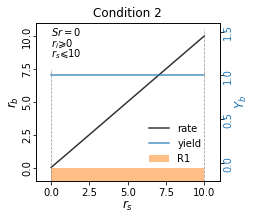

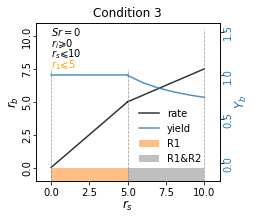

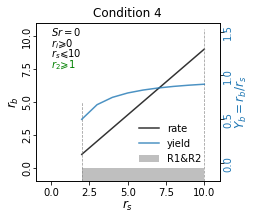

In [8]:

    plot_rs_rb_condition2(model2)
    plot_rs_rb_condition3(model3)
    plot_rs_rb_condition4(model4)

Optimize P rate
plot r<sub>s</sub> - r<sub>p</sub> - Y<sub>p</sub>

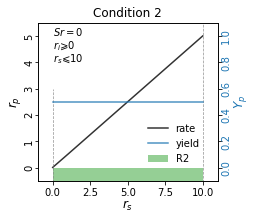

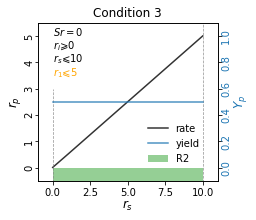

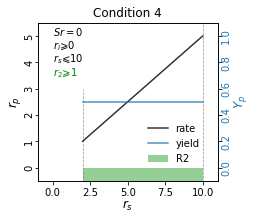

In [9]:

    model = load_toy_model()
    model.objective = 'Rp'
    model2 = toy_model_condition2(model)
    plot_rs_rp_condition2(model2, con_n=2)

    model3 = toy_model_condition3(model)
    plot_rs_rp_condition2(model3, con_n=3)

    model4 = toy_model_condition4(model)
    plot_rs_rp_condition2(model4, con_n=4)

envelope and yield space

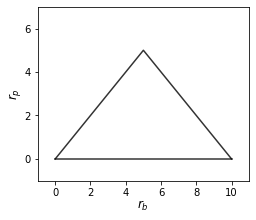

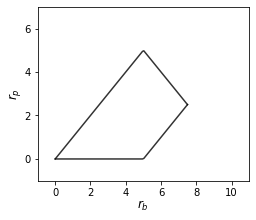

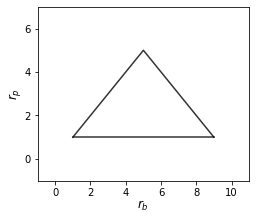

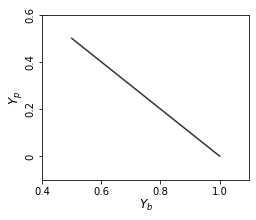

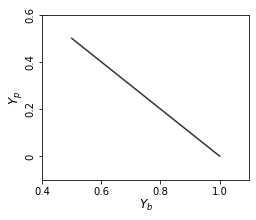

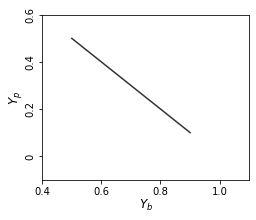

In [10]:

    rxn_x = 'Rb'
    rxn_y = 'Rp'
    plot_opt_envelope(model2, rxn_x, rxn_y)
    plot_opt_envelope(model3, rxn_x, rxn_y)
    plot_opt_envelope(model4, rxn_x, rxn_y)
    #
    plot_opt_yield_space(2)
    plot_opt_yield_space(3)
    plot_opt_yield_space(4)